In [1]:
from tensorflow import keras
model = keras.models.load_model('best-cnn.h5')

In [2]:
model.layers

In [4]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)


(3, 3, 1, 32) (32,)


In [7]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.040508255 0.30298334


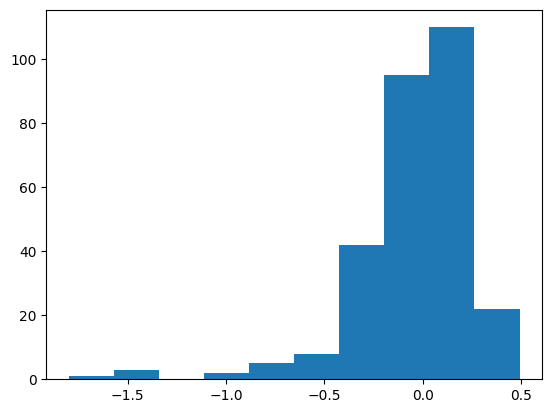

In [8]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.show()

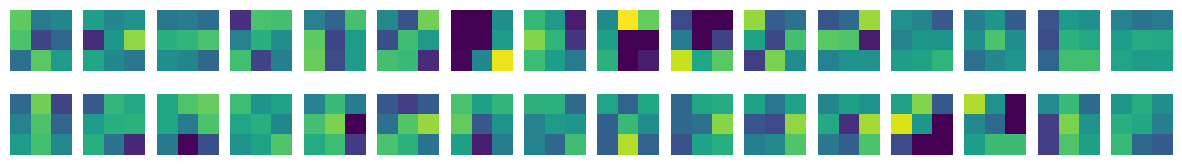

In [10]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for q in range(16):
        axs[i,q].imshow(conv_weights[:,:,0,i*16+q], vmin=-0.5, vmax=0.5)
        axs[i,q].axis('off')
plt.show()

In [12]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same',input_shape=(28,28,1)))

In [14]:
no_training_conv=no_training_model.layers[0]
no_training_conv.weights[0].shape

TensorShape([3, 3, 1, 32])

In [15]:
no_training_weights=no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.0107540665 0.07925667


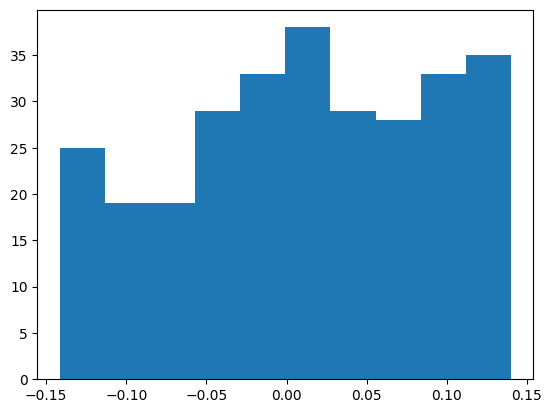

In [16]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.show()

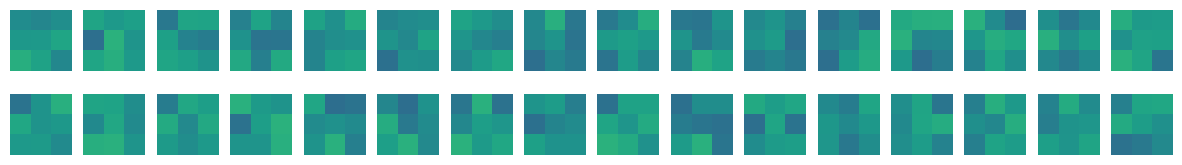

In [17]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for q in range(16):
        axs[i,q].imshow(no_training_weights[:,:,0,i*16+q], vmin=-0.5, vmax=0.5)
        axs[i,q].axis('off')
plt.show()

In [18]:
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_4_input')>

In [19]:
conv_acti=keras.Model(model.input, model.layers[0].output)

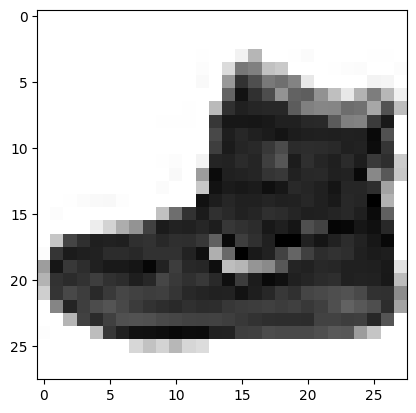

In [20]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [21]:
inputs=train_input[0:1].reshape(-1, 28,28,1)/255.0
feature_maps=conv_acti.predict(inputs)
feature_maps.shape

1/1 [==============================] - 1s 1s/step


(1, 28, 28, 32)

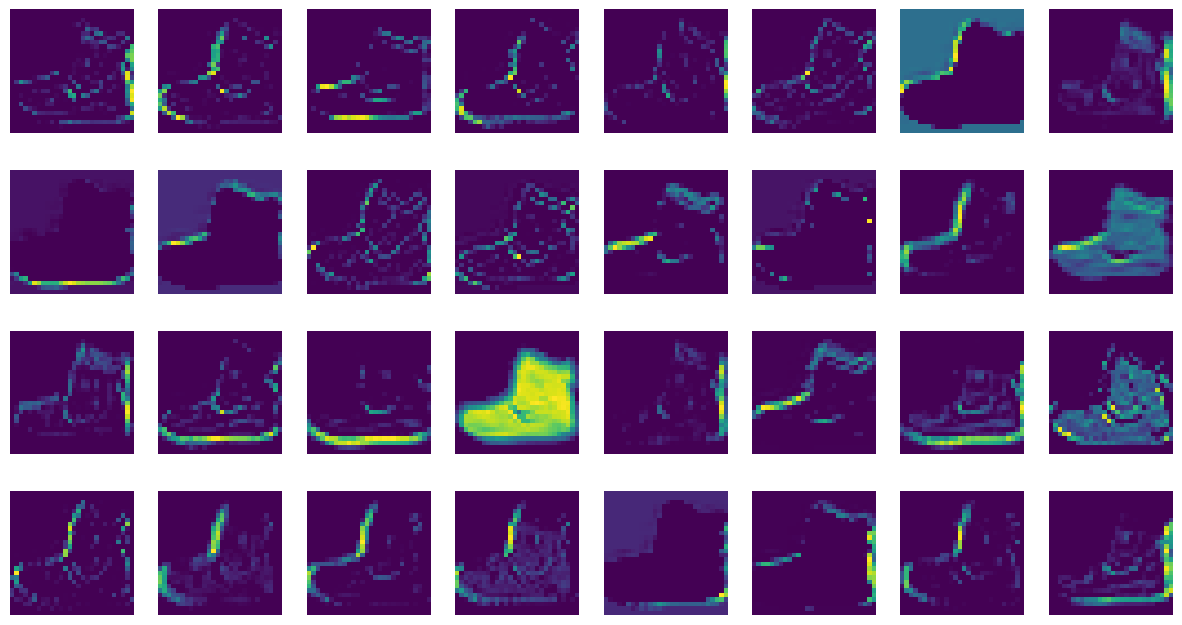

In [24]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
    for q in range(8):
        axs[i,q].imshow(feature_maps[0,:,:,i*8+q])
        axs[i,q].axis('off')
plt.show()

In [25]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [26]:
inputs=train_input[0:1].reshape(-1, 28,28,1)/255.0
feature_maps=conv2_acti.predict(inputs)
feature_maps.shape

1/1 [==============================] - 0s 270ms/step


(1, 14, 14, 64)

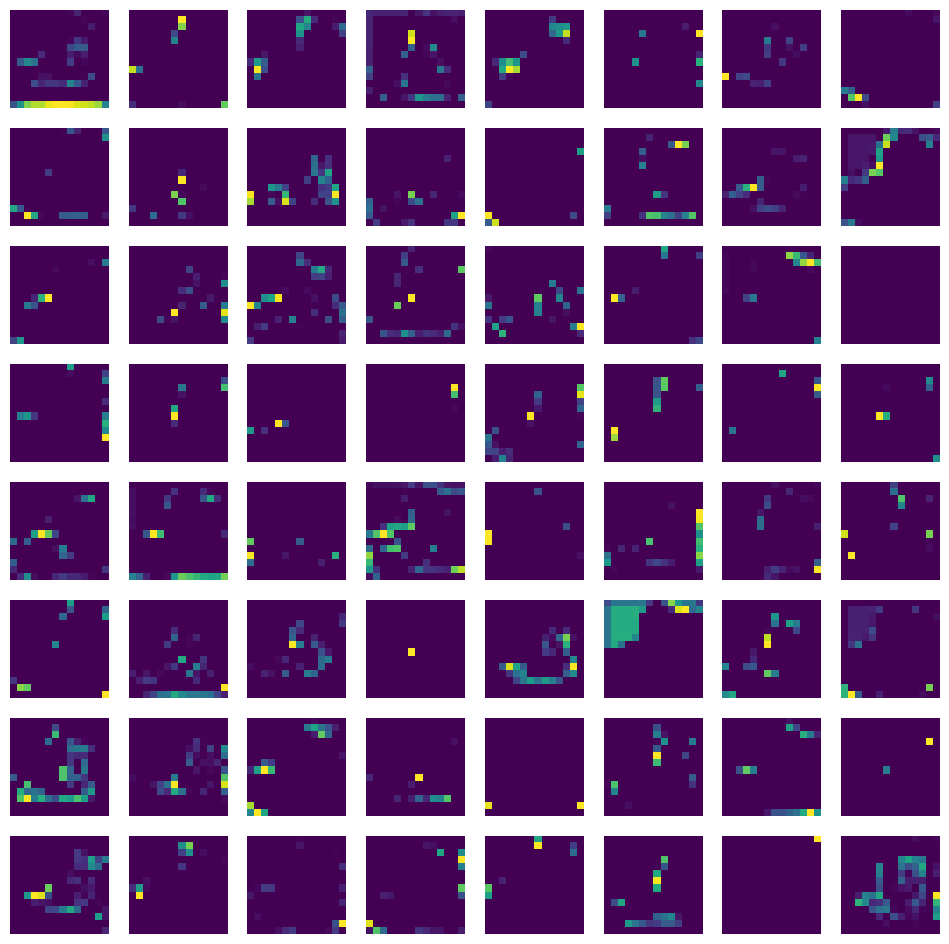

In [27]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))
for i in range(8):
    for q in range(8):
        axs[i,q].imshow(feature_maps[0,:,:,i*8+q])
        axs[i,q].axis('off')
plt.show()